# Part 4: Word frequency over time (Extra Credit)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

plt.style.use('seaborn-v0_8-dark')

In [2]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
df = pd.read_csv("data/SOTU.csv")
df.head()

In [ ]:
from collections import Counter

def count_word_frequencies_over_time(df, target_words):
    """
    df: full SOTU dataframe
    target_words: list of words (use lemmas)
    
    returns a dataframe with columns:
    Year, word1, word2, ...
    """
    
    target_words = [w.lower() for w in target_words]
    
    results = []

    for year in sorted(df['Year'].unique()):
        speeches = df[df['Year'] == year]['Text']

        full_text = " ".join(speeches)

        doc = nlp(full_text)

        lemmas = [token.lemma_.lower() 
                  if not token.is_stop and not token.is_punct and not token.is_space 
                  else None
                  for token in doc]

        lemma_counts = Counter([lemma for lemma in lemmas if lemma is not None])

        row = {'Year': year}
        for w in target_words:
            row[w] = lemma_counts[w]
        
        results.append(row)

    return pd.DataFrame(results)


In [ ]:
target_words = ["america", "economy", "job"]
freq_df = count_word_frequencies_over_time(df, target_words)
freq_df.head()

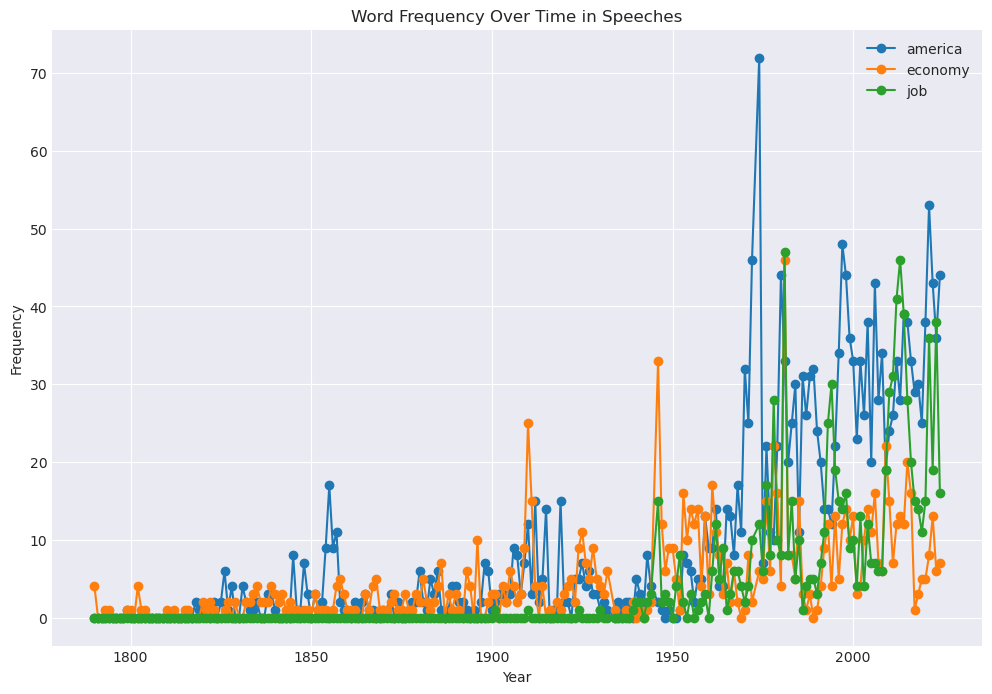

In [12]:
plt.figure(figsize=(12,8))

for word in target_words:
    plt.plot(freq_df["Year"], freq_df[word], marker='o', label=word)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Word Frequency Over Time in Speeches")
plt.grid(True)
plt.show()


### From the graph, we can see that the words “america,” “economy,” and “job” appear very rarely in early speeches but become much more common in the mid-1900s and especially in recent years. “America” rises the most, showing that presidents talk more about national identity over time. “Economy” and “job” also increase, suggesting a growing focus on economic and financial issues.

In [10]:
import os

if not os.path.exists("outputs"):
    os.makedirs("outputs")


In [11]:
freq_df.to_csv("outputs/word_frequency_over_time.csv", index=False)
plt.savefig("outputs/word_frequency_plot.html", dpi=150)


<Figure size 640x480 with 0 Axes>